In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
import imageio
sns.set()
import japanize_matplotlib

In [2]:
path_similarity = "/Users/iomacbookair2/Documents/lab/DEIM2023/word2vec/nichiten/220115_similarity.csv"
# path_similarity = "/Users/labimac/Documents/lab/DEIM2023/word2vec/221214_ann_wed/cosine_similarity_w2v_221214_ann_wed.csv"
df_similarity = pd.read_csv((path_similarity))
df_similarity = df_similarity.drop("texts_by_minute", axis=1)

path_count = "/Users/iomacbookair2/Documents/lab/DEIM2023/word2vec/nichiten/220115_count.csv"
# path_count = "/Users/labimac/Documents/lab/DEIM2023/count/count_221214_ann_wed.csv"
df_count = pd.read_csv((path_count))
df_similarity["tweet"] = df_count["tweet"]
df = df_similarity
start_time = df['created_at'].min()
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
df['created_at'] = df['created_at'].apply(lambda x: (
    datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - start_time).total_seconds() / 60)
df['created_at'] = df['created_at'].apply(lambda x: round(x))
df


,created_at,q1,q2,q3,stdev,tweet
0,0,0.000000,0.247872,0.733923,0.366441,60
1,1,0.165027,0.453224,0.658940,0.301978,94
2,2,0.237295,0.479636,0.636866,0.263714,111
3,3,0.048211,0.438705,0.661849,0.301990,105
4,4,0.216755,0.484878,0.684719,0.276789,98
...,...,...,...,...,...,...
115,115,0.329736,0.571705,0.714191,0.242108,56
116,116,0.397188,0.610091,0.730461,0.237783,55
117,117,0.446219,0.674674,0.798473,0.324671,25
118,118,0.318259,0.770827,0.836587,0.351700,16


In [3]:
window_sizes = [1]


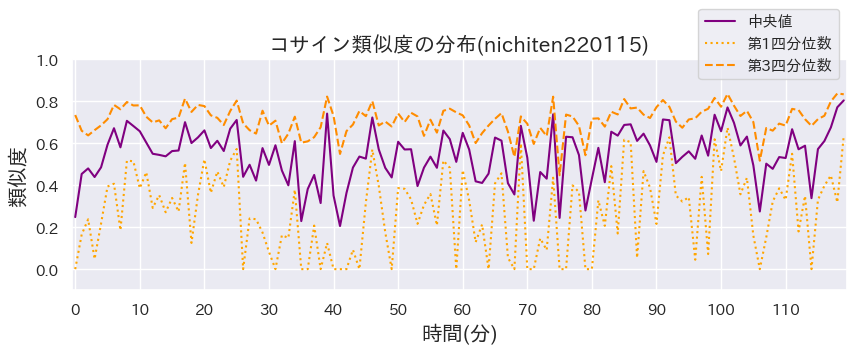

In [34]:
for window in window_sizes:
    df['q1'] = df['q1'].rolling(
        window=window, min_periods=1).mean()
    df['q2'] = df['q2'].rolling(
        window=window, min_periods=1).mean()
    df['q3'] = df['q3'].rolling(
        window=window, min_periods=1).mean()
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_title(
        "コサイン類似度の分布(nichiten220115)", fontsize=15)
    indices = range(0, len(df), 10)
    plt.xticks(indices, df["created_at"][indices])
    num_rows = len(df)
    ax.set_xlim(-0.5, num_rows - 0.5)
    ax.set_ylim(-0.1, 1)
    ax.set_xlabel("時間(分)", fontsize=15)
    ax.set_ylabel("類似度", fontsize=15)
    ax.plot(df["created_at"], df["q2"], color="purple",
             label="中央値")
    ax.plot(df["created_at"], df["q1"], color="orange", linestyle = "dotted",
             label="第1四分位数")
    ax.plot(df["created_at"], df["q3"], color="darkorange", linestyle="dashed",
             label="第3四分位数")
    ax.legend(loc="upper right", bbox_to_anchor=(1, 1.25))
    plt.savefig('quantile_{}.png'.format(window))

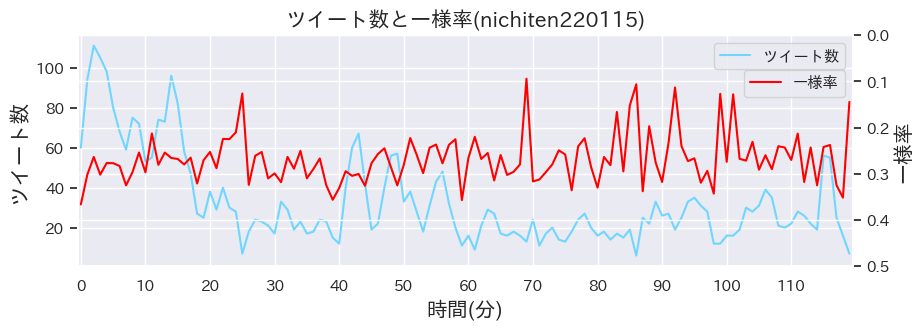

In [36]:
for window in window_sizes:
    df['tweet'] = df['tweet'].rolling(
        window=window, min_periods=1).mean()
    df['stdev'] = df['stdev'].rolling(
        window=window, min_periods=1).mean()
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_title(
        "ツイート数と一様率(nichiten220115)", fontsize=15)
    indices = range(0, len(df), 10)
    plt.xticks(indices, df["created_at"][indices])
    num_rows = len(df)
    ax.set_xlim(-0.5, num_rows - 0.5)
    ax.set_xlabel("時間(分)", fontsize=15)
    ax.set_ylabel("ツイート数", fontsize=15)
    ax.plot(df["created_at"], df["tweet"],
           color="#70d6ff", label="ツイート数")
    ax2 = ax.twinx()
    ax2.set_ylim(0.5, 0)
    ax2.set_ylabel("一様率", fontsize=15)
    ax2.plot(df["created_at"], df["stdev"], color="red",
             label="一様率")
    ax.legend(loc="upper right", bbox_to_anchor=(1, 1))
    ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.88))
    plt.savefig('ichiyou_{}.png'.format(window))
